              date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   
3     1.0           0     0          5      7        1050            910   
4     1.0           0     0          3      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955    

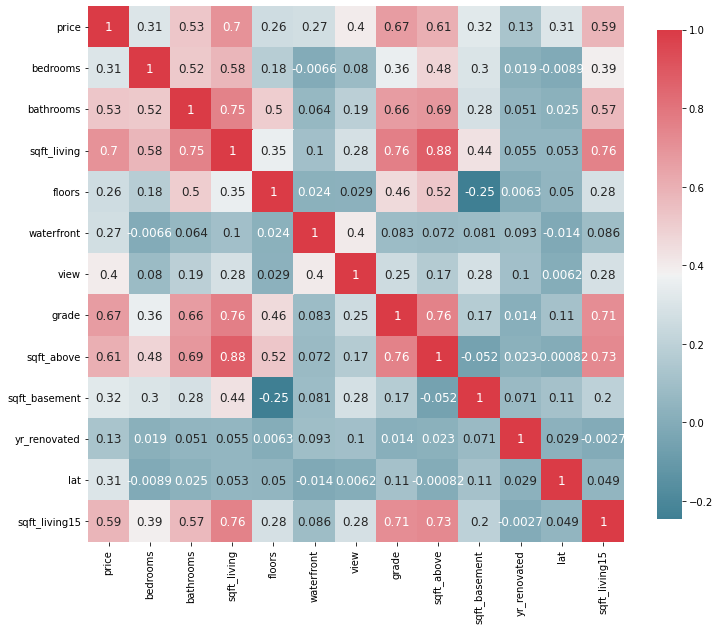

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/kc_house_data.csv",sep=',')

df = df.drop(['id'], axis=1)
# print(df.head())
# print(df.isnull().sum())

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

# plot_correlation_map( df )
df = df.drop(['sqft_lot'], axis=1)
df = df.drop(['condition'], axis=1)
df = df.drop(['long'], axis=1)
df = df.drop(['zipcode'], axis=1)
df = df.drop(['sqft_lot15'], axis=1)
df = df.drop(['yr_built'], axis=1)
# print(df.head())
plot_correlation_map( df )


MSE 113502118121.8914
R squared 0.09716554609469508
a [818532.85047414]
b -38388031.59951045


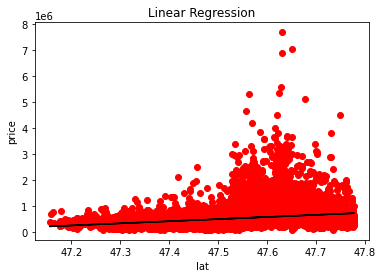

In [44]:
# grid = sns.FacetGrid(df, row="price", col="bedrooms", height=2.2, aspect=1.6)
# grid.map(sns.barplot, "price", 'bedrooms', alpha=.5, ci=None)
# grid.add_legend()

# df.plot.scatter(x = 'bedrooms', y = 'price', s = 5)
# ax = df.plot.bar(x='bedrooms', y='price', rot=0)
# df.plot.scatter(x = 'sqft_living', y = 'price', s = 5)
# ax = df.plot.bar(x='sqft_living', y='price', rot=0)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

train, test = train_test_split(df, test_size=0.35)
x=df["floors"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print("a", model.coef_)
print("b", model.intercept_)

plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("floors")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [38]:
#extract x and y from our data
x=df[["floors","bedrooms", 'grade', "sqft_living"]]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

from sklearn.preprocessing import PolynomialFeatures 
# create matrix and vectors


# x_=poly.fit_transform(x)
# print("x before transformation: ", x)
# print("x after transformation: ", x_)
# lg.fit(x_, y)


MSE 57057856756.392586
R squared 0.5461423998242616


MSE:  107687056767.14389
R squared:  0.14342052203268807


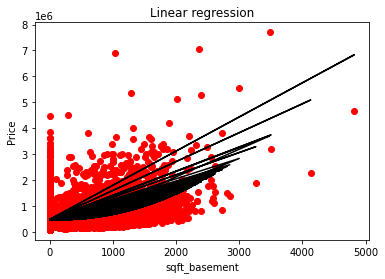

In [46]:
train, test = train_test_split(df, test_size=0.35)
x=df["sqft_basement"].values[:,np.newaxis]
y=df["price"].values
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Price")
plt.xlabel("sqft_basement")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 